In [2]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

from Utils.embedding import plot_results

load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002", chunk_size=1)
test_text_embeddings = [
    "UNA",
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht FTX?",
    "Für was steht SG1?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht PYT?",
    "Für was steht LIN?",
]


results = []
loader = PyPDFLoader(
    "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
    extract_images=False,
)
pages = loader.load_and_split()
faiss_index = FAISS.from_documents(pages, embeddings)

<>:30: SyntaxWarning: invalid escape sequence '\M'
<>:30: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_24868\3993118305.py:30: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Erzeuge aus der liste "input_texts" embeddings.

In [3]:
np.array(faiss_index.similarity_search_with_score(test_text_embeddings[3], 1))

array([[Document(page_content="Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  \nSt = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  \n Seite:19 /96  \n \n Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  \n  \n 0030 8   DTM   D 1 1  Enddatum Liefer- / Leistungshorizont  \n  \n Standard  Implementierung  \nBez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  \nDTM       DTM   \nC507  Datum/Uhrzeit/Zeitspanne  M   M    \n2005  Datums- oder Uhrzeits- oder  \nZeitspannen -Funktion, Qualifier  M an..3   M an..3 +159   159  Planungshorizont, Endedatum  \n2380  Datum oder Uhrzeit oder  \nZeitspanne, Wert  C an..35   R n..8 :20160420  Enddatum einer bestimmten Abrechnungsperiode  \n2379  Datums- oder Uhrzeit- oder  \nZeitspannen -Format, Code  C an..3   R an..3 :102'   102  CCYYMMDD  \n Anmerkungen  Das Enddatum Liefer- / Leistungshorizont ist das l etzte Datum

Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [4]:
results = np.zeros((10, 10))
results_embedding = []
for i in range(10):
    results[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 10)
    )[:, 1]
    results_embedding.append(faiss_index.similarity_search(test_text_embeddings[i], 10))

print(results)

[[0.52414978 0.52499211 0.52956891 0.5384022  0.54451787 0.54666704
  0.54790962 0.5499301  0.55252546 0.55510253]
 [0.49716812 0.50099945 0.50744832 0.51441276 0.51774013 0.52189595
  0.52227068 0.52283013 0.52363455 0.52508175]
 [0.51827711 0.5223093  0.5282582  0.53120756 0.53395879 0.53565514
  0.5363692  0.53838426 0.53951639 0.53953099]
 [0.41428033 0.42084447 0.42276162 0.42442602 0.42921355 0.43237025
  0.433635   0.4346711  0.44522315 0.44806617]
 [0.44781628 0.46535176 0.47925442 0.48504871 0.49885267 0.50783306
  0.50946862 0.50965923 0.51190197 0.51712322]
 [0.43659616 0.43878436 0.44768119 0.45823237 0.4588449  0.46132135
  0.46254045 0.46298295 0.46376207 0.46393898]
 [0.47356433 0.47474772 0.47661099 0.48021302 0.48096544 0.48569712
  0.48626465 0.48633736 0.48751554 0.48790911]
 [0.44839579 0.48377967 0.48832852 0.48938209 0.50187677 0.50466746
  0.50498438 0.50534928 0.51007515 0.51076841]
 [0.49612486 0.53530467 0.53748107 0.54709667 0.55501896 0.55881584
  0.56400192

Visualisierung der Scores zu den einzelnen Fragen.

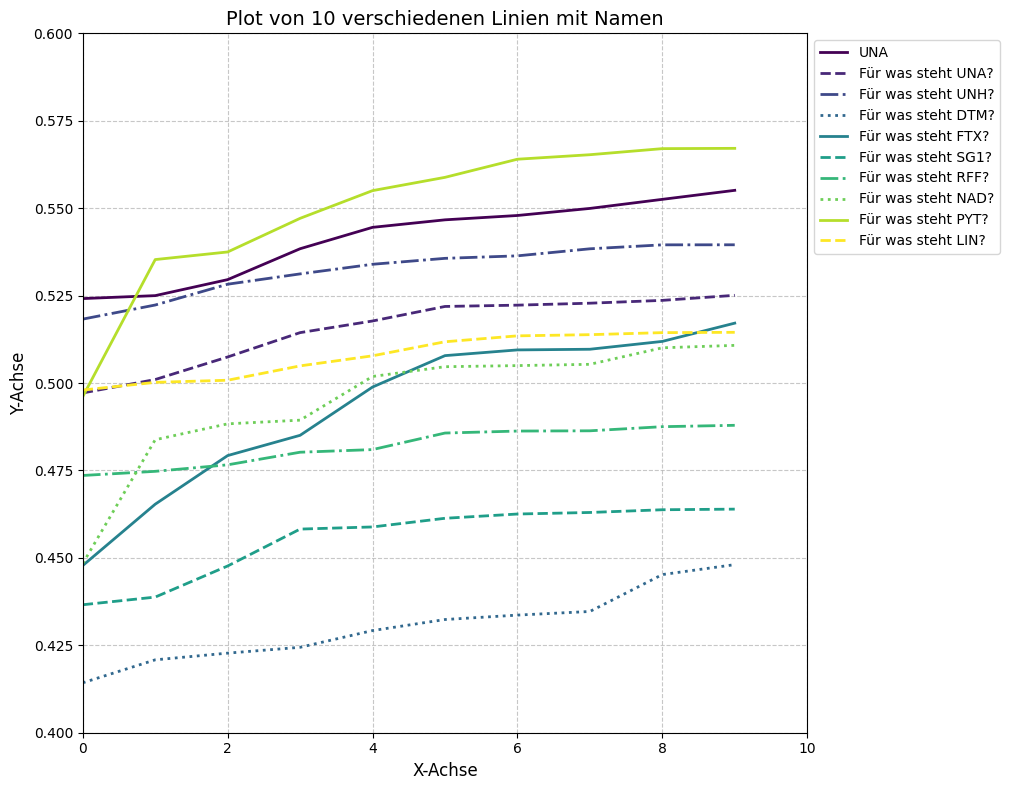

In [8]:
plot_results(results, test_text_embeddings,(0.4, 0.6))	

Im Folgenden werden die besten Ergebnisse für die Beantwortung aller Fragen präsentiert. Es ist jedoch zu konstatieren, dass lediglich teilweise die richtigen Antworten erkannt werden und Tabellen somit unbrauchbar interpretiert werden. Aus diesem Grund wird das Modell „text-embedding-ada-002” für diesen Teil nicht mehr berücksichtigt.

In [15]:
for i in range(10):
    print("-----------------------------------------")
    print(f"{i}."+ test_text_embeddings[i])
    print("-----------------------------------------")
    
    print(results_embedding[i][0].page_content)

-----------------------------------------
0.UNA
-----------------------------------------
Nachrichtenaufbaudiagramm benutzter Segmente/Gruppe n  
  
 
  Bez  Bez = Segment -/Gruppen -Bezeichner  
  St  MaxWdh  St = Status (M=Muss/Mandatory, C=Conditional, R=Erf orderlich/Required, O=Optional, D=Abhängig von  / Dependent, A=Empfohlen  / Advised)  
  Nr  MaxWdh = Maximale Wiederholung der Segmente/Gruppen  
  Nr = Laufende Segmentnummer im Guide  
   Seite:8 /96  
 
  
SG2  
R 1 
 
NAD  
M 1 
13 
 SG2 
D 1 
 
NAD  
M 1 
18 
  
 
 
 
 
 
 
  
 
 
  
 
UNA 
O 1 
1 
 
UNB 
M 1 
2 
 
UNH 
M 1 
3 
 
BGM 
M 1 
4 
 
DTM  
R 1 
5 
 
DTM  
R 1 
6 
 
DTM  
O 1 
7 
 
DTM  
O 1 
8 
 
FTX  
O 99 
9 
 
FTX  
O 99 
10 
 
SG1  
D 1 
 
RFF  
M 1 
11 
 
SG1  
O 1 
 
RFF  
M 1 
12 
 
SG3  
D 1 
 
RFF 
M 1 
14  
 
SG3  
D 1 
 
RFF  
M 1 
15  
 
SG5  
O 1 
 
CTA 
M 1 
16  
 
COM  
O 4 
17 
 
SG2  
D 1 
 
NAD  
M 1 
19 
 
SG2  
O 1 
 
NAD  
M 1 
20 
 
 
SG2  
R 1 
 
NAD  
M 1 
21 
 
SG3  
D 1 
 
RFF  
M 1 
22